##  Unsupervised machine learning

### *Human Activity Recognition using Smartphones Dataset*

Dataset description available at: 
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

*The experiments have been carried out with a group of 30 volunteers (…). 

Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (…). 

Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity (…). The experiments have been video-recorded to label the data manually. The dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data*

**Data Structure** (main files):
* Activity codes: “activity_labels.txt” (2 columns)
* Features: “features.txt” (561 rows, 2 columns)
* Subjects (train ; test): “train/subject_train.txt” (7352 rows, 1 column), “test/subject_test.txt” (2947 rows, 1 column)
* Input features X (train; test): “train/X_train.txt” (7352 rows, 561 columns), “test/X_test.txt” (2947 rows, 561 columns). Feature values are normalized and bounded within [-1,1]
* Output features y (train; test): “train/y_train.txt” (7352 rows, 1 column), “test/y_test.txt” (2947 rows, 1 column)


**Variables:**
For each record in the dataset it is provided: 
* A 561-feature vector with time and frequency domain variables. 
* Its activity label. 
* An identifier of the subject who carried out the experiment.


In [1]:
### Imports
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import os

In [2]:
os.chdir("c:/Users/filip/AILS_2023/Day1/Unsupervised_ML/data/har")

## Part 1. Data loading and pre-processing

**Ex.1**. Read the files with the activity labels, features, subject IDs, and input and output features (*activity_labels.txt*, *features.txt*, *train/subject_train.txt*, 
   *test/subject_test.txt*, *train/X_train.txt*, *test/X_test.txt*, *train/y_train.txt*, *test/y_test.txt*). Check the content and data types of each dataframe.

In [3]:
activities = pd.read_csv('activity_labels.txt', sep=' ', header=None, names=('ID','Activity'))
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        6 non-null      int64 
 1   Activity  6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


In [4]:
features = pd.read_csv("features.txt", sep = " ", header = None, names=('ID','Sensor'))
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      561 non-null    int64 
 1   Sensor  561 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [5]:
subjects_tr = pd.read_csv("train/subject_train.txt", header = None, names=['SubjectID'])
subjects_tst = pd.read_csv("test/subject_test.txt", header = None, names=['SubjectID']) 
subjects_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SubjectID  7352 non-null   int64
dtypes: int64(1)
memory usage: 57.6 KB


In [6]:
x_train = pd.read_csv("train/X_train.txt", sep = "\s+", header = None) # x train data
x_test = pd.read_csv("test/X_test.txt", sep = "\s+", header = None) # x test data

In [7]:
y_train = pd.read_csv("train/y_train.txt", sep = "\s+", header = None) # y train data
y_test = pd.read_csv("test/y_test.txt", sep = "\s+", header = None) # y test data

**Ex. 2**. Concat the train and test data for subjects, X, and y. Change the name of the columns of X to the names of the features (available in the *Sensor* column of the features file loaded previously)

In [8]:
subjects_all = pd.concat([subjects_tr, subjects_tst], ignore_index=True)
print(subjects_all.shape)

(10299, 1)


In [9]:
x_all = pd.concat([x_train, x_test], ignore_index = True)
print(x_all.shape)

(10299, 561)


In [10]:
y_all = pd.concat([y_train, y_test], ignore_index=True)
print(y_all.shape)

(10299, 1)


In [11]:
sensorNames = features['Sensor']
x_all.columns = sensorNames
x_all.head()

Sensor,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


**Ex.3**. Replace the activity codes by the respective designation (column *Activity* of the activity labels file)

In [12]:
for i in activities['ID']:
    activity = activities[activities['ID'] == i]['Activity'] 
    y_all = y_all.replace({i: activity.iloc[0]})
    
y_all.columns = ['Activity']
y_all.head()

,Activity
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING


**Ex.4**. Concat subjects, X, and y into a single dataframe, and save it to a csv file (*HAR_clean.csv*)

In [13]:
x_all = pd.concat([x_all, subjects_all], axis=1)
allXy = pd.concat([x_all, y_all], axis=1)
allXy.to_csv("HAR_clean.csv")
allXy.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",SubjectID,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


## Part 2. Data exploration

**Ex. 1**. Group the data by activity and check the size of each group. Represent the results using a pie plot

In [14]:
activity_counts = allXy.groupby('Activity').size().reset_index(name='Count')
activity_counts

,Activity,Count
0,LAYING,1944
1,SITTING,1777
2,STANDING,1906
3,WALKING,1722
4,WALKING_DOWNSTAIRS,1406
5,WALKING_UPSTAIRS,1544


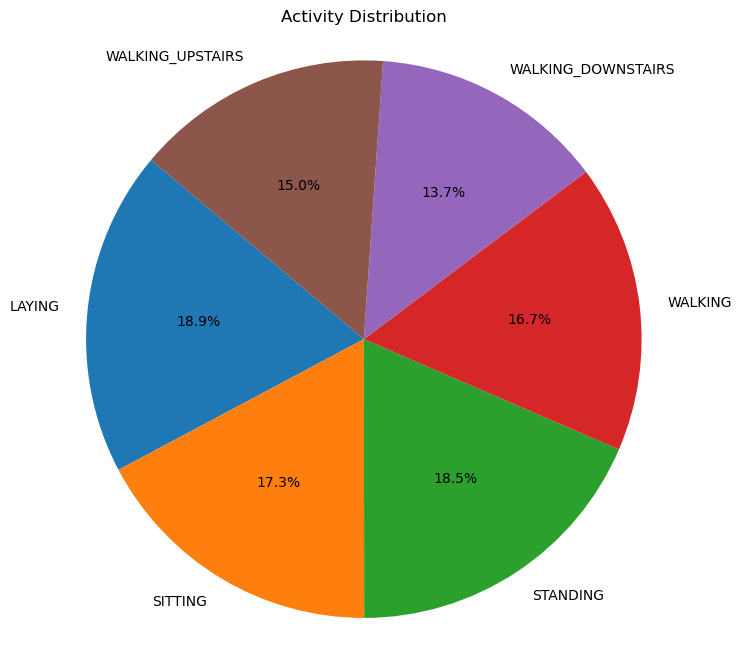

In [15]:
plt.figure(figsize=(8, 8))

plt.pie(activity_counts['Count'], labels=activity_counts['Activity'], autopct='%1.1f%%', startangle=140)
plt.title('Activity Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie plot
plt.show()

**Ex.2**. Verify if there are missing values in the data

In [16]:
activity_counts.isnull().sum()

Activity    0
Count       0
dtype: int64

**Ex. 3**. Verify the overall statistics of the input features in the allXy dataset (mean, std, min, max, etc.) and the data distribution of the first three features. Represent the results using a histogram.

In [17]:
allXy.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",SubjectID
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [18]:
first_three_features = allXy.iloc[:,:3]
first_three_features

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z
0,0.288585,-0.020294,-0.132905
1,0.278419,-0.016411,-0.123520
2,0.279653,-0.019467,-0.113462
3,0.279174,-0.026201,-0.123283
4,0.276629,-0.016570,-0.115362
...,...,...,...
10294,0.310155,-0.053391,-0.099109
10295,0.363385,-0.039214,-0.105915
10296,0.349966,0.030077,-0.115788
10297,0.237594,0.018467,-0.096499


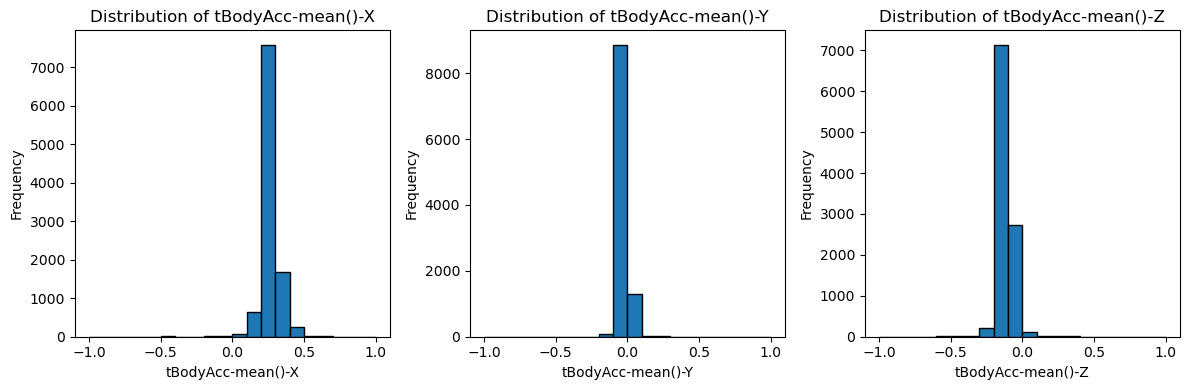

Overall statistics of the input features
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
count       10299.000000       10299.000000       10299.000000
mean            0.274347          -0.017743          -0.108925
std             0.067628           0.037128           0.053033
min            -1.000000          -1.000000          -1.000000
25%             0.262625          -0.024902          -0.121019
50%             0.277174          -0.017162          -0.108596
75%             0.288354          -0.010625          -0.097589
max             1.000000           1.000000           1.000000


In [19]:
# Create histograms for each of the first three features
plt.figure(figsize=(12, 4))
for i, column in enumerate(first_three_features.columns):
    
    plt.subplot(1, 3, i + 1)
    plt.hist(first_three_features[column], bins=20, edgecolor='k')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display overall statistics of the third input features
print("Overall statistics of the input features")
print(first_three_features.describe())

**Ex. 4**. Group the data by activity and subject id, and aggregate it using the mean. Save the resulting dataframe to a csv file (*HAR_agg.csv*)

In [20]:
allXy.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",SubjectID,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [21]:
allXy['Activity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10299 entries, 0 to 10298
Series name: Activity
Non-Null Count  Dtype 
--------------  ----- 
10299 non-null  object
dtypes: object(1)
memory usage: 80.6+ KB


In [22]:
allXy.reset_index(drop=True, inplace=True)

In [27]:
# Group the data by 'Activity' and 'Subject' and calculate the mean for each group
agg_data = allXy.groupby(['Activity', 'SubjectID']).mean().reset_index()
# Verify the first few rows of the aggregated DataFrame
print(agg_data.head(4))

  Activity  SubjectID  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  \
0   LAYING          1           0.221598          -0.040514   
1   LAYING          2           0.281373          -0.018159   
2   LAYING          3           0.275517          -0.018956   
3   LAYING          4           0.263559          -0.015003   

   tBodyAcc-mean()-Z  tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
0          -0.113204         -0.928056         -0.836827         -0.826061   
1          -0.107246         -0.974059         -0.980277         -0.984233   
2          -0.101300         -0.982777         -0.962058         -0.963691   
3          -0.110688         -0.954194         -0.941714         -0.962667   

   tBodyAcc-mad()-X  tBodyAcc-mad()-Y  ...  fBodyBodyGyroJerkMag-meanFreq()  \
0         -0.932111         -0.840911  ...                         0.176486   
1         -0.976607         -0.980964  ...                         0.264802   
2         -0.985280         -0.965100  ...              

In [28]:
# Save the resulting DataFrame to a CSV file
agg_data.to_csv("HAR_agg.csv", index=False)

## Part 3. Unsupervised Learning

**Ex. 1**. Apply a PCA to the input data to explain at least 80% of the variability. Represent the variance explained by each one of the first 10 PCs using a bar plot

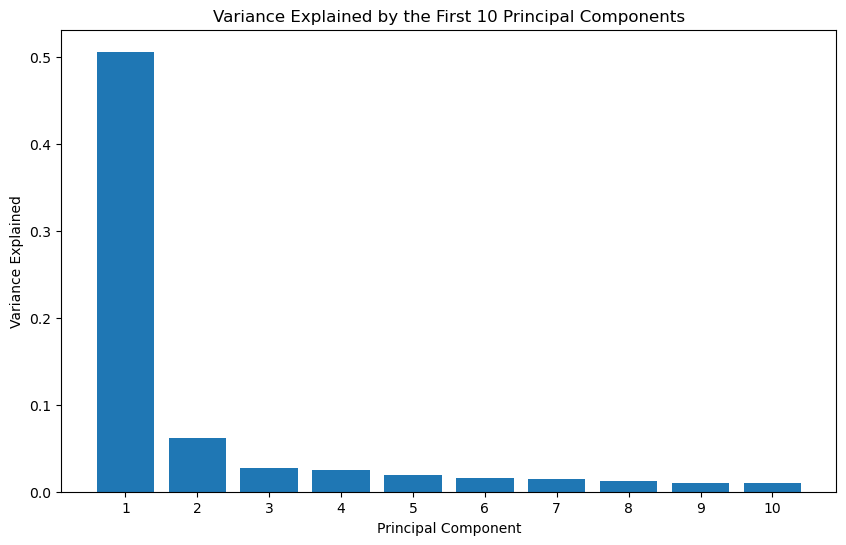

In [48]:
#standardizing the data
scaler = StandardScaler()
x_all_scaled = pd.DataFrame(scaler.fit_transform(x_all.iloc[:,:], x_all.iloc[:,:]))
x_all_scaled.columns = x_all.columns[:]
x_all_scaled 

# Determine the number of components to explain 80% of variability
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
n_components = next(i for i, explained_var in enumerate(cumulative_variance) if explained_var >= 0.8) + 1

# Perform dimensionality reduction using the selected number of components
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(x_all_scaled) # X_reduced contains data reduced to the selected number of components

# Get the explained variances for the first 10 PCs
explained_variances = pca.explained_variance_ratio_[:10]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variances) + 1), explained_variances, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by the First 10 Principal Components')
plt.xticks(range(1, len(explained_variances) + 1))

plt.show()

**Ex. 2**. Represent the PCs in a scatter plot. Color the points according to the *Activity* column

In [63]:
allXy.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",SubjectID,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


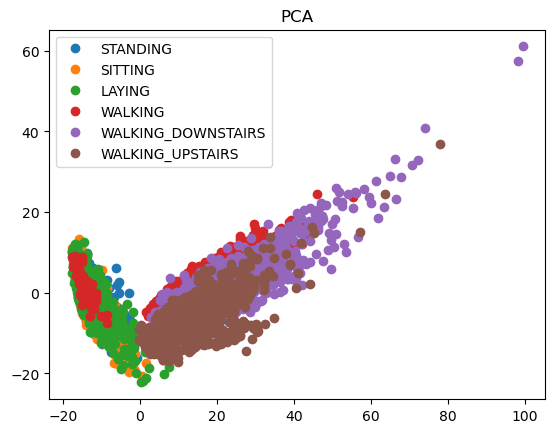

In [66]:
for activity in allXy['Activity'].unique():
    sp = allXy.index[allXy['Activity']==activity]-1
    plt.plot(X_reduced[sp,0],X_reduced[sp,1], 'o' , label=activity)
    # to change PC1/PC2 to other PCs change the 0 or 1 to other indexes
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

**Ex. 3**. Compute k-means cluster. Create a crosstab according to the *Activity*

In [71]:
k=6 # nr of clusters
kmeans_act = KMeans(n_clusters=k, max_iter=1000, n_init = 10)

## max_iter - number of iterations of the algorithm in each run
## n_init - number of runs from the algorithm; the solution is the one with best objective function value

kmeans_act.fit(x_all_scaled) # Fit the K-Means model to the scaled data and assigns each data point to one of the 6 clusters.
labels = kmeans_act.labels_ # get cluster labels

centroids = kmeans_act.cluster_centers_ # get cluster centroids
pd.crosstab(labels, allXy["Activity"], rownames=['clusters']) # creates a crosstabulation that shows how many data points from each species are assigned to each cluster.

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clusters,,,,,,
0,54,1238,1346,0,0,0
1,0,0,0,740,892,294
2,329,447,560,0,0,2
3,5,1,0,905,321,1243
4,1556,91,0,0,0,0
5,0,0,0,77,193,5


**Ex. 4**. Compute the hierarchical cluster using the aggregated data (*HAR_agg.csv*) and visualize the resulting tree. (Leafs coloured with *Activity*)

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## to be sure we can see graphs in the notebook need to run the following line
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

agg_data.head()

,Activity,SubjectID,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,LAYING,1,0.221598,-0.040514,-0.113204,-0.928056,-0.836827,-0.826061,-0.932111,-0.840911,...,0.176486,-0.423225,-0.707314,0.021366,0.003060,-0.001667,0.084437,0.426706,-0.520344,-0.352413
1,LAYING,2,0.281373,-0.018159,-0.107246,-0.974059,-0.980277,-0.984233,-0.976607,-0.980964,...,0.264802,-0.444286,-0.751344,0.005792,-0.006356,0.065286,-0.029371,0.617423,-0.519733,-0.478928
2,LAYING,3,0.275517,-0.018956,-0.101300,-0.982777,-0.962058,-0.963691,-0.985280,-0.965100,...,0.110698,-0.309437,-0.632643,0.017896,0.016648,0.045587,0.031726,0.423506,-0.630063,-0.346243
3,LAYING,4,0.263559,-0.015003,-0.110688,-0.954194,-0.941714,-0.962667,-0.957950,-0.945799,...,0.202949,-0.340798,-0.636794,-0.002358,-0.015504,0.007130,0.036657,0.553490,-0.763217,-0.229790
4,LAYING,5,0.278334,-0.018304,-0.107938,-0.965935,-0.969296,-0.968563,-0.969062,-0.971518,...,0.024737,-0.267949,-0.634819,0.021209,0.055365,-0.005813,-0.034442,0.598733,-0.825300,-0.168146


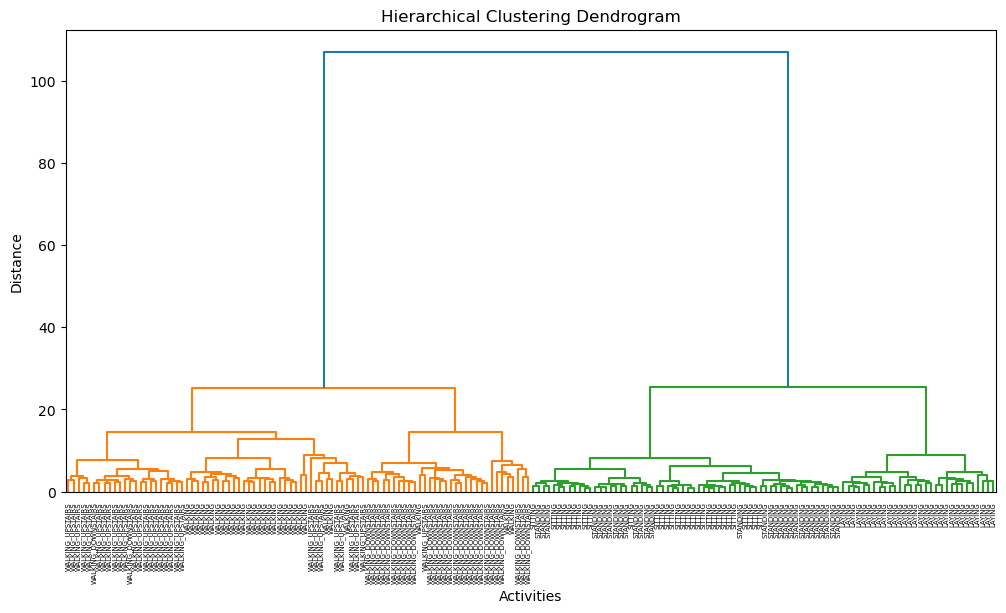

In [89]:
# Load the aggregated data

# Extract the 'Activity' column for coloring leaves later
activity_labels = agg_data['Activity']

# Remove the 'Activity' column for clustering
data = agg_data.drop(columns=['Activity', 'SubjectID'])

# Compute the linkage matrix
linkage_matrix = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=activity_labels.values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Activities')
plt.ylabel('Distance')
plt.show()